In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV

In [9]:
df_raw = pd.read_csv("C:\\Users\\rochm\\Desktop\\btcusd_1-min_data.csv", low_memory = False)

In [10]:
df_raw.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [11]:
df_raw.tail()

,Timestamp,Open,High,Low,Close,Volume
6773276,1.740441e+09,91382.0,91382.0,91330.0,91369.0,0.700140
6773277,1.740441e+09,91390.0,91448.0,91388.0,91433.0,3.175210
6773278,1.740442e+09,91448.0,91554.0,91380.0,91554.0,1.608990
6773279,1.740442e+09,91516.0,91712.0,91481.0,91712.0,2.316768
6773280,NaN,57854.0,57864.0,57835.0,57835.0,1.353466


In [12]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773281 entries, 0 to 6773280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 310.1 MB


In [13]:
df_raw.isnull().sum()

Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [14]:
df = df_raw.copy()

In [15]:
df.dropna(inplace = True)
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit = 's')
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [17]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume
6773275,2025-02-24 23:56:00,91432.0,91464.0,91362.0,91362.0,1.056746
6773276,2025-02-24 23:57:00,91382.0,91382.0,91330.0,91369.0,0.700140
6773277,2025-02-24 23:58:00,91390.0,91448.0,91388.0,91433.0,3.175210
6773278,2025-02-24 23:59:00,91448.0,91554.0,91380.0,91554.0,1.608990
6773279,2025-02-25 00:00:00,91516.0,91712.0,91481.0,91712.0,2.316768


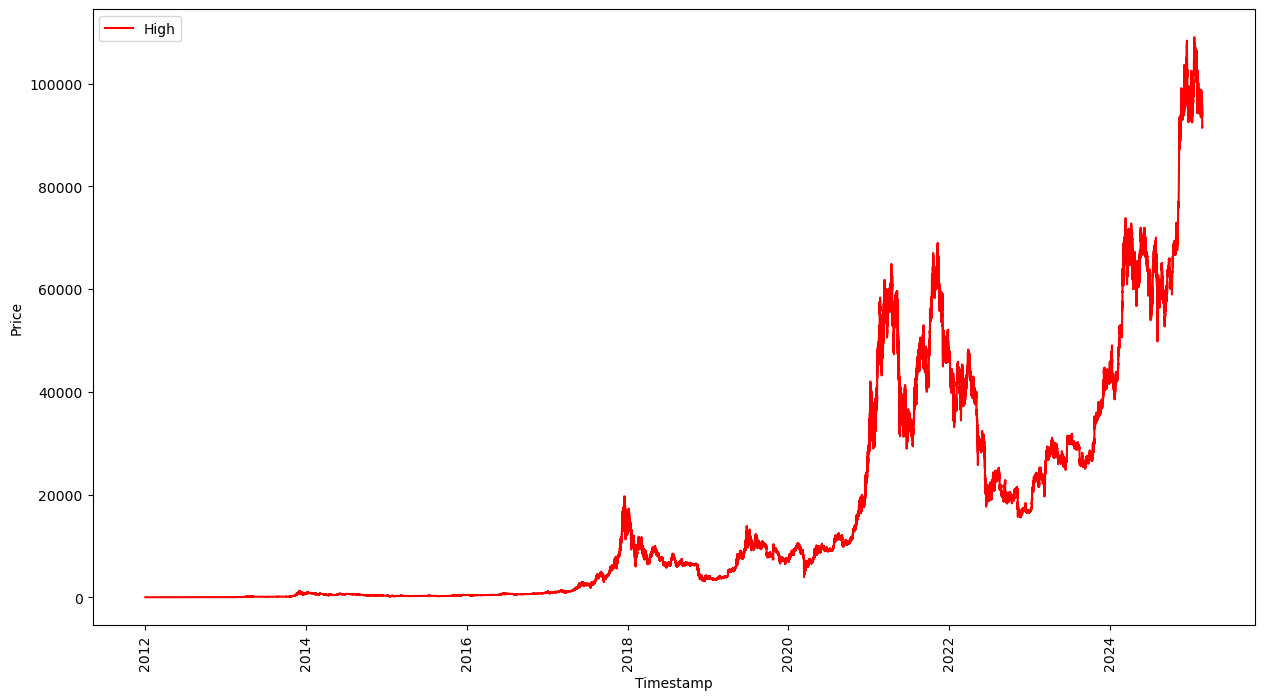

In [18]:
plt.figure(figsize= [15, 8])
plt.plot(df['Timestamp'],df['High'], color = 'red', label ='High')
plt.ylabel('Price')
plt.xlabel('Timestamp')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

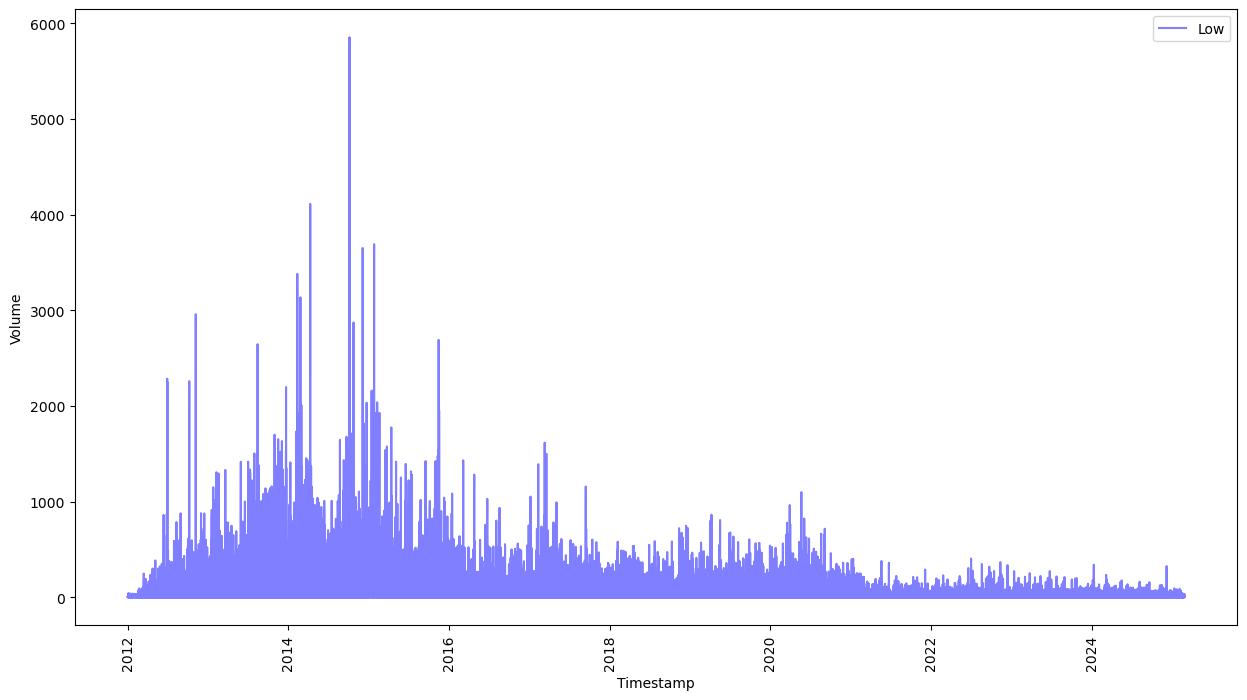

In [19]:
plt.figure(figsize = [15,8])
plt.plot(df['Timestamp'],df['Volume'], color = 'blue', label = 'Low', alpha = 0.5)
plt.ylabel('Volume')
plt.xlabel('Timestamp')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [20]:
df['Timestamp'] = df['Timestamp'].astype(np.int64) // 10**9
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1325412060,4.58,4.58,4.58,4.58,0.0
1,1325412120,4.58,4.58,4.58,4.58,0.0
2,1325412180,4.58,4.58,4.58,4.58,0.0
3,1325412240,4.58,4.58,4.58,4.58,0.0
4,1325412300,4.58,4.58,4.58,4.58,0.0


In [21]:
data_volumen = df
target = df.pop('Close')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_volumen, target, test_size = 0.2, random_state = 42, shuffle = True)

In [23]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())])

param_dist = {
    'poly__degree': [1, 2, 3, 4, 5]
}

kf = KFold(n_splits = 2, shuffle = True, random_state = 42)
random_grid = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv = kf, n_iter = 5, verbose = 5, scoring='r2')


random_grid.fit(X_train, y_train)

print("Best params: ", random_grid.best_params_)
print("Best score: ", random_grid.best_score_)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END ....................poly__degree=1;, score=1.000 total time=   2.3s
[CV 2/2] END ....................poly__degree=1;, score=1.000 total time=   2.0s
[CV 1/2] END ....................poly__degree=2;, score=0.999 total time=   5.5s
[CV 2/2] END ....................poly__degree=2;, score=0.999 total time=   6.2s
[CV 1/2] END ....................poly__degree=3;, score=0.997 total time=  16.5s
[CV 2/2] END ....................poly__degree=3;, score=0.997 total time=  12.9s
[CV 1/2] END ....................poly__degree=4;, score=0.994 total time=  37.0s
[CV 2/2] END ....................poly__degree=4;, score=0.994 total time=  33.8s
[CV 1/2] END ....................poly__degree=5;, score=0.990 total time= 1.5min
[CV 2/2] END ....................poly__degree=5;, score=0.990 total time= 1.5min
Best params:  {'poly__degree': 1}
Best score:  0.9999997671113829


In [28]:
y_pred = random_grid.predict(X_test)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, 
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))

0.9999997739504658
95.90227553586837
